### 2.8) College data set

-  This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US

#### Exercise 2.8
    (a) Read csv
    (b) University names as index
    (c) EDA
        i. Summary
        ii. Pair plot
        iii. Box plots
        iv. Elite variable
        v. Histograms

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Print only 2 decimal cases.
pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline

#### (a) Read csv

In [2]:
data_loc = "../data/College.csv"
college_df = pd.read_csv(data_loc)

In [3]:
college_df.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56


#### (b) University names as index

In [4]:
college_df = college_df.set_index("Unnamed: 0")
college_df.index.name = "Names"
college_df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Names,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56


In [5]:
# Alternative solution: We could have done this all in one less line with:
college_df = pd.read_csv(data_loc, index_col='Unnamed: 0')
college_df.index.name = 'Names'
college_df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Names,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56


#### (c) i. Summary

- Produce a numerical summary of the variables in the data set.

In [6]:
college_df.describe(include="all")

### row - [2, 3, 4] Without the 'all' option, the column 'Private' is not shown because it is categorical

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
unique,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,Yes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,565,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,"3,001.64","2,018.80",779.97,27.56,55.80,"3,699.91",855.30,"10,440.67","4,357.53",549.38,"1,340.64",72.66,79.70,14.09,22.74,"9,660.17",65.46
std,NaN,"3,870.20","2,451.11",929.18,17.64,19.80,"4,850.42","1,522.43","4,023.02","1,096.70",165.11,677.07,16.33,14.72,3.96,12.39,"5,221.77",17.18
min,NaN,81.00,72.00,35.00,1.00,9.00,139.00,1.00,"2,340.00","1,780.00",96.00,250.00,8.00,24.00,2.50,0.00,"3,186.00",10.00
25%,NaN,776.00,604.00,242.00,15.00,41.00,992.00,95.00,"7,320.00","3,597.00",470.00,850.00,62.00,71.00,11.50,13.00,"6,751.00",53.00
50%,NaN,"1,558.00","1,110.00",434.00,23.00,54.00,"1,707.00",353.00,"9,990.00","4,200.00",500.00,"1,200.00",75.00,82.00,13.60,21.00,"8,377.00",65.00
75%,NaN,"3,624.00","2,424.00",902.00,35.00,69.00,"4,005.00",967.00,"12,925.00","5,050.00",600.00,"1,700.00",85.00,92.00,16.50,31.00,"10,830.00",78.00


In [7]:
# Alternative solution: call describe twice. One on number, and another on object.
college_df.describe(include=['number'])

# or college_df.describe(include=[np.number])

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,"3,001.64","2,018.80",779.97,27.56,55.80,"3,699.91",855.30,"10,440.67","4,357.53",549.38,"1,340.64",72.66,79.70,14.09,22.74,"9,660.17",65.46
std,"3,870.20","2,451.11",929.18,17.64,19.80,"4,850.42","1,522.43","4,023.02","1,096.70",165.11,677.07,16.33,14.72,3.96,12.39,"5,221.77",17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,"2,340.00","1,780.00",96.00,250.00,8.00,24.00,2.50,0.00,"3,186.00",10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,"7,320.00","3,597.00",470.00,850.00,62.00,71.00,11.50,13.00,"6,751.00",53.00
50%,"1,558.00","1,110.00",434.00,23.00,54.00,"1,707.00",353.00,"9,990.00","4,200.00",500.00,"1,200.00",75.00,82.00,13.60,21.00,"8,377.00",65.00
75%,"3,624.00","2,424.00",902.00,35.00,69.00,"4,005.00",967.00,"12,925.00","5,050.00",600.00,"1,700.00",85.00,92.00,16.50,31.00,"10,830.00",78.00
max,"48,094.00","26,330.00","6,392.00",96.00,100.00,"31,643.00","21,836.00","21,700.00","8,124.00","2,340.00","6,800.00",103.00,100.00,39.80,64.00,"56,233.00",118.00


In [8]:
college_df.describe(include=['object'])

# or college_df.describe(include=['O'])

,Private
count,777
unique,2
top,Yes
freq,565


#### (c) ii. Pair plot

- produce a scatterplot matrix of the first ten columns or variables of the data

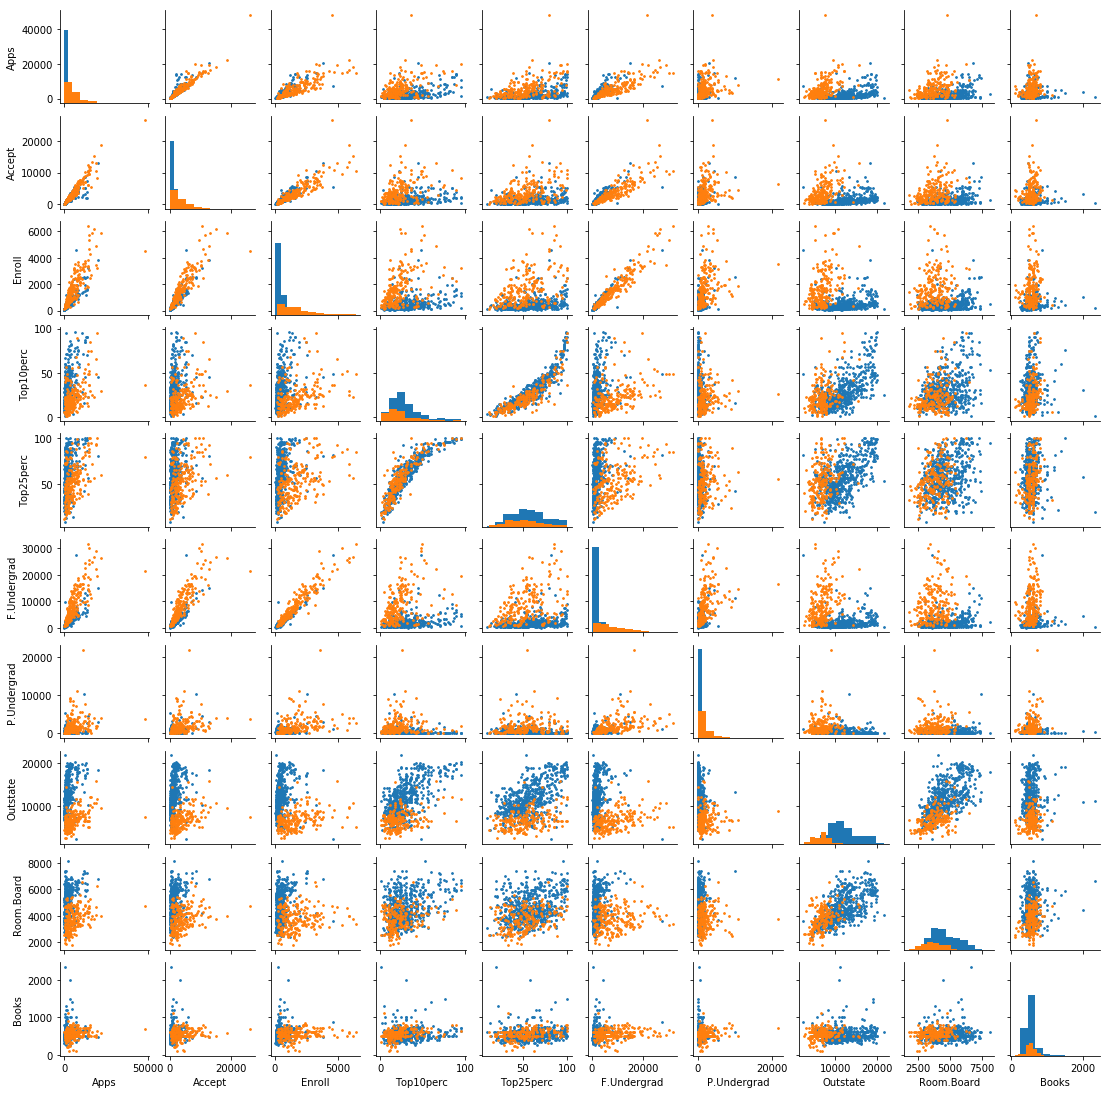

In [19]:
sc_plot = sns.PairGrid(college_df, vars=college_df.iloc[:,1:11], hue='Private')
sc_plot.map_upper(plt.scatter, s = 3)
sc_plot.map_diag(plt.hist)
sc_plot.map_lower(plt.scatter, s =3)
sc_plot.fig.set_size_inches(15, 15)
plt.show()

#### (c) iii. Box plots

- produce side-by-side boxplots of Outstate versus Private.

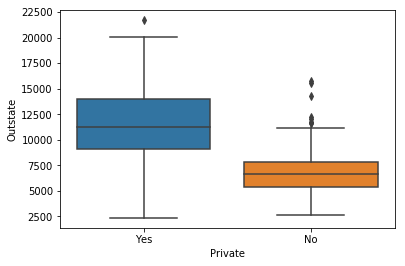

In [18]:
sns.boxplot(x="Private", y="Outstate", data = college_df)
plt.show()

#### (c) iv. Elite variable

- Create a new qualitative variable, called Elite, by binning the Top10perc variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.


- see how many elite universities there are. Now use the plot() function to produce side-by-side boxplots of Outstate versus Elite.


No. of elite Universities: 78

Boxplot - Elite vs,. Outstate


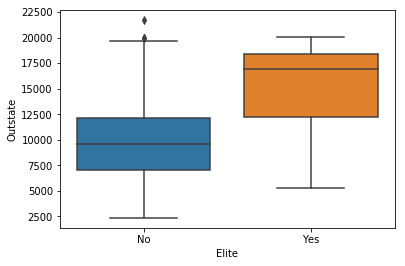

In [42]:
college_df.loc[college_df["Top10perc"] > 50, "Elite"] = "Yes"
college_df["Elite"] = college_df["Elite"].fillna("No")

print("\nNo. of elite Universities: {0}\n".format(sum(college_df["Elite"] ==  "Yes")))

print("Boxplot - Elite vs,. Outstate")
sns.boxplot(x="Elite", y = 'Outstate', data=college_df)
plt.show()

#### (c) v. Histograms

- produce some histograms with differing numbers of bins for a few of the quantitative variables.

In [61]:
### Create Bins
college_df["PhD_Bins"] = pd.cut(college_df["PhD"], bins=3, labels= ['Low', 'Medium', 'High'])
college_df['Grad.Rate_Bins'] = pd.cut(college_df['Grad.Rate'], 5, labels=['Very low', 'Low', 'Medium', 'High', 'Very high'])
college_df['Books_Bins'] = pd.cut(college_df['Books'], 2, labels=['Low', 'High'])
college_df['Enroll_Bins'] = pd.cut(college_df['Enroll'], 4, labels=['Very low', 'Low', 'High', 'Very high'])

print("PhD_Bins:\n\n", college_df["PhD_Bins"].value_counts())
print("Grad.Rate_Bins:\n\n", college_df["Grad.Rate_Bins"].value_counts())
print("Books_Bins:\n\n", college_df["Books_Bins"].value_counts())
print("Enroll_Bins:\n\n", college_df["Enroll_Bins"].value_counts())

PhD_Bins:

 High      455
Medium    294
Low        28
Name: PhD_Bins, dtype: int64
Grad.Rate_Bins:

 Medium       340
High         213
Low          179
Very high     26
Very low      19
Name: Grad.Rate_Bins, dtype: int64
Books_Bins:

 Low     771
High      6
Name: Books_Bins, dtype: int64
Enroll_Bins:

 Very low     677
Low           73
High          20
Very high      7
Name: Enroll_Bins, dtype: int64


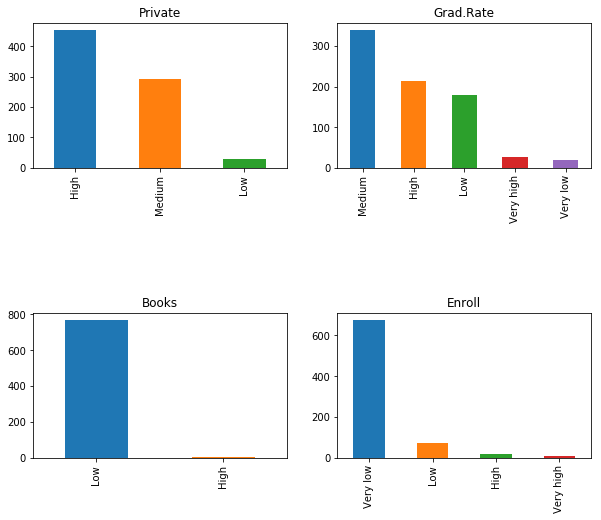

In [71]:
# Plot histograms
fig = plt.figure(figsize=(10, 8))

plt.subplot(221)
college_df['PhD_Bins'].value_counts().plot(kind='bar', title = 'Private');

plt.subplot(222)
college_df['Grad.Rate_Bins'].value_counts().plot(kind='bar', title = 'Grad.Rate');

plt.subplot(223)
college_df['Books_Bins'].value_counts().plot(kind='bar', title = 'Books');

plt.subplot(224)
college_df['Enroll_Bins'].value_counts().plot(kind='bar', title = 'Enroll');

fig.subplots_adjust(hspace=1) # To add space between subplots